In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV, cross_val_score, train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
import tensorflow as tf
import warnings

warnings.simplefilter(action='ignore')

In [2]:
car = pd.read_csv('CAR_DETAILS_FROM_CAR_DEKHO.csv')
car

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner


In [3]:
car.shape

(4340, 8)

In [4]:
car.isna().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

# Exploratory Data Analysis (EDA)

In [5]:
def basic_info(df):
    """
    Get basic information about the dataset including shape, datatypes, statistics, null values and duplicated values.
    """
    print(f'Shape of this dataset is {df.shape}.')
    print('='*50)
    print(df.info())
    print("="*50)
    print(df.describe())

def check_null(df):
    a = df.isnull().sum() 
    if a[a>0].any():
        print(a[a>0])
    else:
        print('No null values found!')
            
            
def check_unique(df):
    print(df.nunique())
    for col in df.columns:
        b = df[col].unique()
        if len(b)<12:
            print(f'{col} has {len(b)} unique values ->> {b}', end = '\n\n')

In [6]:
basic_info(car)

Shape of this dataset is (4340, 8).
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB
None
              year  selling_price      km_driven
count  4340.000000   4.340000e+03    4340.000000
mean   2013.090783   5.041273e+05   66215.777419
std       4.215344   5.785487e+05   46644.102194
min    1992.000000   2.000000e+04       1.000000
25%    2011.000000   2.087498e+05   35000.000000
50%    2014.000000   3.500000e+05   60000.000000
75%    2016.000000   6.00000

In [7]:
check_null(car)

No null values found!


In [8]:
check_unique(car)

name             1491
year               27
selling_price     445
km_driven         770
fuel                5
seller_type         3
transmission        2
owner               5
dtype: int64
fuel has 5 unique values ->> ['Petrol' 'Diesel' 'CNG' 'LPG' 'Electric']

seller_type has 3 unique values ->> ['Individual' 'Dealer' 'Trustmark Dealer']

transmission has 2 unique values ->> ['Manual' 'Automatic']

owner has 5 unique values ->> ['First Owner' 'Second Owner' 'Fourth & Above Owner' 'Third Owner'
 'Test Drive Car']



In [9]:
car['age'] = 2023 - car['year']

In [10]:
car.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'age'],
      dtype='object')

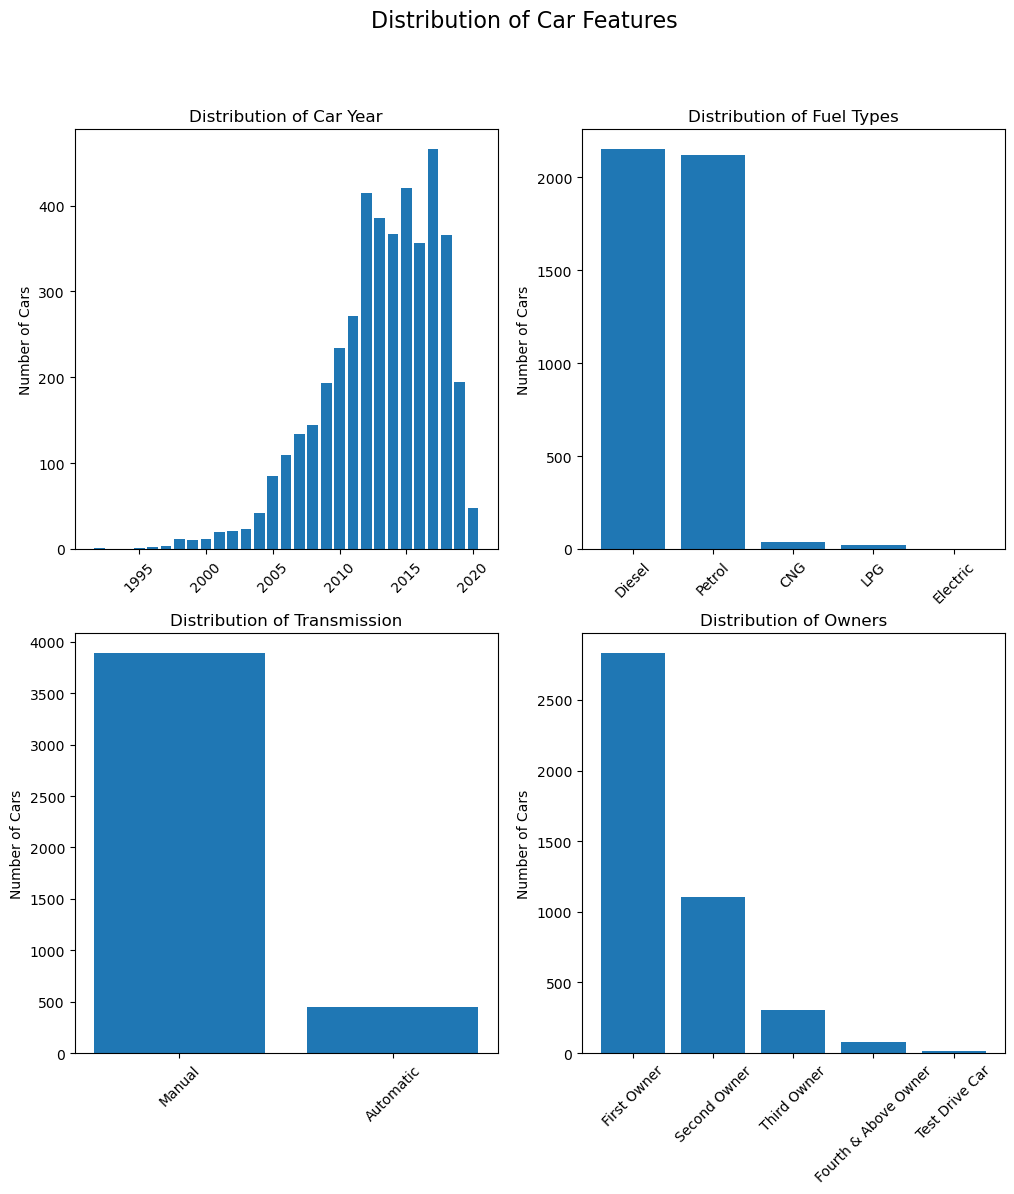

In [11]:
caryear = car['year'].value_counts().reset_index()
caryear.columns = ['year', 'Count']

price = car['selling_price'].value_counts().reset_index()
price.columns = ['selling_price', 'Count']

km_d = car['km_driven'].value_counts().reset_index()
km_d.columns = ['km_driven', 'Count']

fuelt = car['fuel'].value_counts().reset_index()
fuelt.columns = ['fuel', 'Count']

trsms = car['transmission'].value_counts().reset_index()
trsms.columns = ['transmission', 'Count']

cowner = car['owner'].value_counts().reset_index()
cowner.columns = ['owner', 'Count']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))
fig.suptitle('Distribution of Car Features', fontsize=16)

# Plot 1
axes[0, 0].bar(caryear['year'], caryear['Count'])
axes[0, 0].set_title('Distribution of Car Year')
axes[0, 0].set_ylabel('Number of Cars')
axes[0, 0].tick_params(axis='x', rotation=45)

# Plot 2
axes[0, 1].bar(fuelt['fuel'], fuelt['Count'])
axes[0, 1].set_title('Distribution of Fuel Types')
axes[0, 1].set_ylabel('Number of Cars')
axes[0, 1].tick_params(axis='x', rotation=45)

# Plot 3
axes[1, 0].bar(trsms['transmission'], trsms['Count'])
axes[1, 0].set_title('Distribution of Transmission')
axes[1, 0].set_ylabel('Number of Cars')
axes[1, 0].tick_params(axis='x', rotation=45)

# Plot 4
axes[1, 1].bar(cowner['owner'], cowner['Count'])
axes[1, 1].set_title('Distribution of Owners')
axes[1, 1].set_ylabel('Number of Cars')
axes[1, 1].tick_params(axis='x', rotation=45)

# Data Visualization

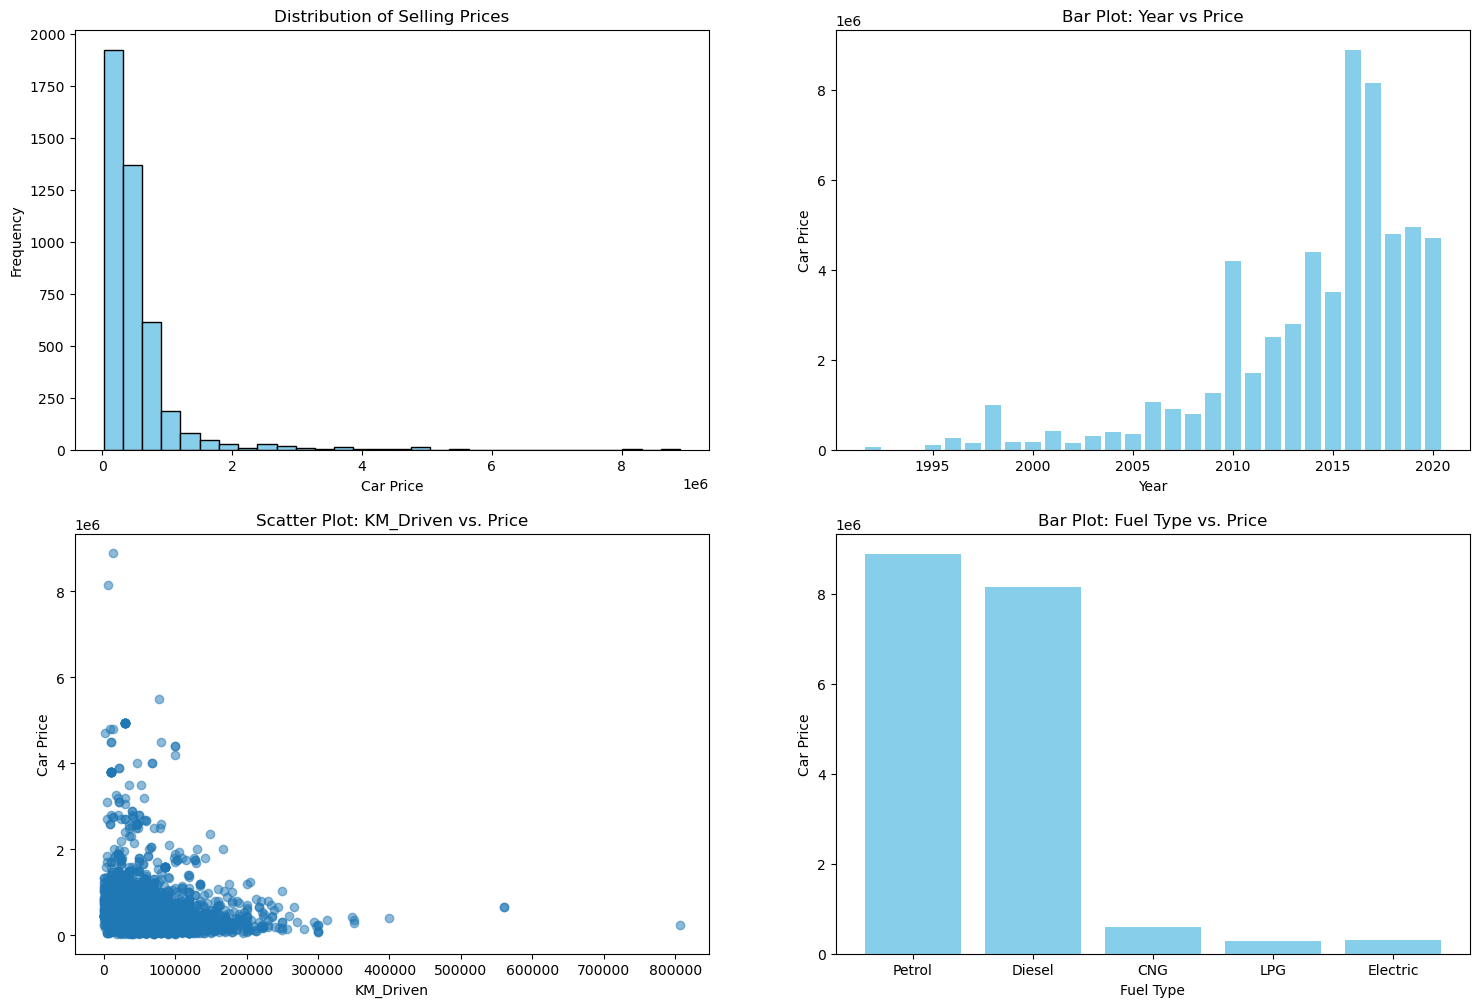

In [12]:
plt.figure(figsize=(18, 12))
plt.subplot(2, 2, 1)
plt.hist(car['selling_price'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Selling Prices')
plt.xlabel('Car Price')
plt.ylabel('Frequency')

plt.subplot(2, 2, 2)
plt.bar(car['year'], car['selling_price'], color='skyblue')
plt.title('Bar Plot: Year vs Price')
plt.xlabel('Year')
plt.ylabel('Car Price')

plt.subplot(2, 2, 3)
plt.scatter(car['km_driven'], car['selling_price'], alpha=0.5)
plt.title('Scatter Plot: KM_Driven vs. Price')
plt.xlabel('KM_Driven')
plt.ylabel('Car Price')

plt.subplot(2, 2, 4)
plt.bar(car['fuel'], car['selling_price'], color='skyblue')
plt.title('Bar Plot: Fuel Type vs. Price')
plt.xlabel('Fuel Type')
plt.ylabel('Car Price')

plt.show()

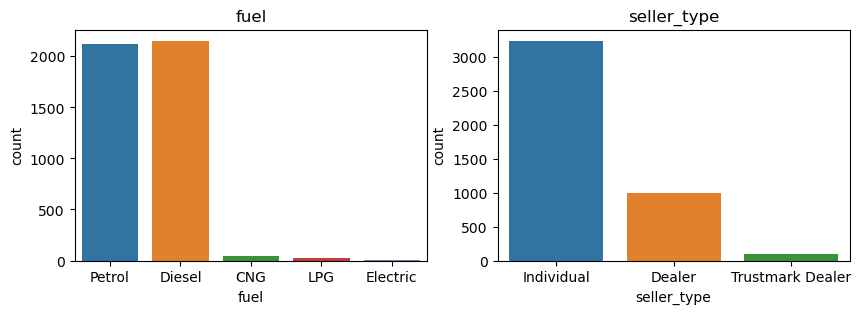

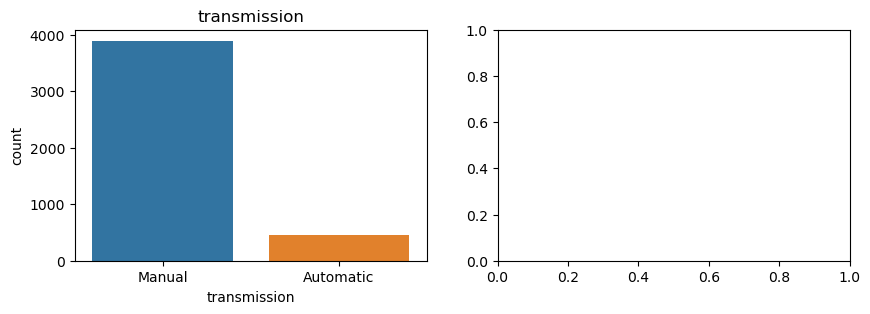

In [13]:
cat_cols = ['fuel', 'seller_type', 'transmission']
i = 0

while i < len(cat_cols):
    fig = plt.figure(figsize=[10, 3])
    ax1 = fig.add_subplot(121)
    ax2 = fig.add_subplot(122)

    ax1.set_title(cat_cols[i])
    sns.countplot(x=cat_cols[i], data=car, ax=ax1)

    i += 1

    # Check if there are more columns to plot
    if i < len(cat_cols):
        ax2.set_title(cat_cols[i])
        sns.countplot(x=cat_cols[i], data=car, ax=ax2)

    i += 1

plt.show()


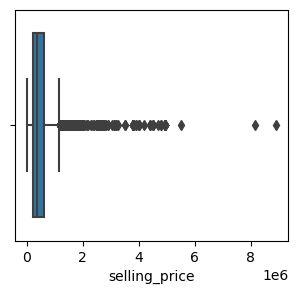

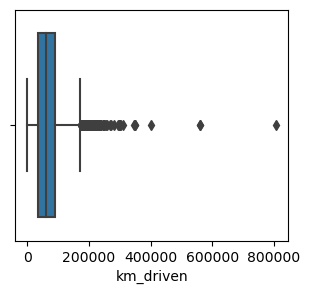

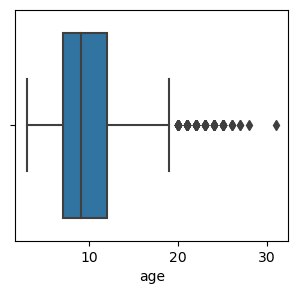

In [14]:
num_cols = ['selling_price', 'km_driven', 'age']
i = 0

while i < len(num_cols):
    fig = plt.figure(figsize=[12, 3])

    plt.subplot(1, 3, 1)
    sns.boxplot(x=num_cols[i], data=car)  # Assuming 'car' is your DataFrame

    i += 1

plt.show()

In [15]:
car[car['selling_price'] > car['selling_price'].quantile(0.99)]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,age
89,Mercedes-Benz S-Class S 350d Connoisseurs Edition,2017,8150000,6500,Diesel,Dealer,Automatic,First Owner,6
101,Mercedes-Benz E-Class Exclusive E 200 BSIV,2018,4500000,9800,Petrol,Dealer,Automatic,First Owner,5
539,Mercedes-Benz GL-Class 350 CDI Blue Efficiency,2014,4400000,100000,Diesel,Individual,Automatic,Second Owner,9
553,Mercedes-Benz C-Class Progressive C 220d,2018,3800000,10000,Diesel,Dealer,Automatic,First Owner,5
555,BMW X5 xDrive 30d xLine,2019,4950000,30000,Diesel,Dealer,Automatic,First Owner,4
572,Mercedes-Benz C-Class Progressive C 220d,2018,3800000,10000,Diesel,Dealer,Automatic,First Owner,5
574,BMW X5 xDrive 30d xLine,2019,4950000,30000,Diesel,Dealer,Automatic,First Owner,4
591,Mercedes-Benz C-Class Progressive C 220d,2018,3800000,10000,Diesel,Dealer,Automatic,First Owner,5
593,BMW X5 xDrive 30d xLine,2019,4950000,30000,Diesel,Dealer,Automatic,First Owner,4
610,Mercedes-Benz C-Class Progressive C 220d,2018,3800000,10000,Diesel,Dealer,Automatic,First Owner,5


In [16]:
car[car['km_driven'] > car['km_driven'].quantile(0.99)]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,age
69,Chevrolet Tavera Neo LS B3 - 7(C) seats BSIII,2010,280000,350000,Diesel,Individual,Manual,Second Owner,13
70,Toyota Corolla Altis Diesel D4DG,2011,350000,230000,Diesel,Individual,Manual,First Owner,12
197,Mahindra Xylo E4,2009,229999,230000,Diesel,Individual,Manual,Third Owner,14
525,Maruti SX4 S Cross DDiS 320 Delta,2016,665000,560000,Diesel,Dealer,Manual,First Owner,7
1101,Tata Indica DLS,2006,85000,300000,Diesel,Individual,Manual,Second Owner,17
1116,Toyota Innova 2.5 V Diesel 7-seater,2005,200000,223000,Diesel,Individual,Manual,First Owner,18
1243,Maruti Swift VXI BSIII,2009,250000,806599,Petrol,Dealer,Manual,First Owner,14
1253,Toyota Corolla Altis D-4D J,2014,715000,234000,Diesel,Individual,Manual,First Owner,9
1414,Skoda Superb Elegance 2.0 TDI CR AT,2011,450000,235000,Diesel,Individual,Automatic,First Owner,12
1426,Mahindra Scorpio VLX AT 2WD BSIII,2004,225000,223660,Diesel,Individual,Automatic,Third Owner,19


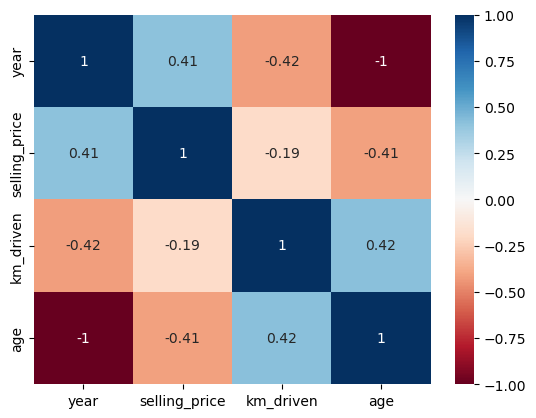

In [17]:
sns.heatmap(car.corr(numeric_only=True), annot=True, cmap="RdBu")
plt.show()

In [18]:
car.corr(numeric_only=True)['selling_price']

year             0.413922
selling_price    1.000000
km_driven       -0.192289
age             -0.413922
Name: selling_price, dtype: float64

In [19]:
car

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,age
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,16
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,16
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,11
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,6
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,9
...,...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner,9
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner,9
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner,14
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner,7


In [20]:
car.drop(labels='name',axis= 1, inplace = True)

In [21]:
car.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,age
0,2007,60000,70000,Petrol,Individual,Manual,First Owner,16
1,2007,135000,50000,Petrol,Individual,Manual,First Owner,16
2,2012,600000,100000,Diesel,Individual,Manual,First Owner,11
3,2017,250000,46000,Petrol,Individual,Manual,First Owner,6
4,2014,450000,141000,Diesel,Individual,Manual,Second Owner,9


In [22]:
car1 = pd.get_dummies(data = car,drop_first=True)

In [23]:
car1.tail()

,year,selling_price,km_driven,age,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
4335,2014,409999,80000,9,True,False,False,False,True,False,True,False,True,False,False
4336,2014,409999,80000,9,True,False,False,False,True,False,True,False,True,False,False
4337,2009,110000,83000,14,False,False,False,True,True,False,True,False,True,False,False
4338,2016,865000,90000,7,True,False,False,False,True,False,True,False,False,False,False
4339,2016,225000,40000,7,False,False,False,True,True,False,True,False,False,False,False


In [24]:
X = car1.drop('selling_price',axis=1).values
y = car1['selling_price'].values

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print("X train: ",X_train.shape)
print("X test: ",X_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

X train:  (3472, 14)
X test:  (868, 14)
y train:  (3472,)
y test:  (868,)


In [26]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [27]:
X_train

array([[ 1.15922118, -0.34590571, -1.15922118, ..., -0.58799357,
        -0.06362848, -0.27128043],
       [-1.20442454,  0.08200741,  1.20442454, ..., -0.58799357,
        -0.06362848, -0.27128043],
       [ 0.92285661, -0.34590571, -0.92285661, ..., -0.58799357,
        -0.06362848, -0.27128043],
       ...,
       [ 0.45012746, -1.16069509, -0.45012746, ..., -0.58799357,
        -0.06362848, -0.27128043],
       [ 0.45012746,  0.50992054, -0.45012746, ...,  1.70069888,
        -0.06362848, -0.27128043],
       [ 0.21376289,  1.79365991, -0.21376289, ..., -0.58799357,
        -0.06362848, -0.27128043]])

In [28]:
CV = []
R2_train = []
R2_test = []

def car_pred_model(model,model_name):
    # Training model
    model.fit(X_train,y_train)
            
    # R2 score of train set
    y_pred_train = model.predict(X_train)
    R2_train_model = r2_score(y_train,y_pred_train)
    R2_train.append(round(R2_train_model,2))
    
    # R2 score of test set
    y_pred_test = model.predict(X_test)
    R2_test_model = r2_score(y_test,y_pred_test)
    R2_test.append(round(R2_test_model,2))
    
    # R2 mean of train set using Cross validation
    cross_val = cross_val_score(model ,X_train ,y_train ,cv=5)
    cv_mean = cross_val.mean()
    CV.append(round(cv_mean,2))
    
    # Printing results
    print("Train R2-score :",round(R2_train_model,2))
    print("Test R2-score :",round(R2_test_model,2))
    print("Train CV scores :",cross_val)
    print("Train CV mean :",round(cv_mean,2))
    
    # Plotting Graphs 
    # Residual Plot of train data
    fig, ax = plt.subplots(1,2,figsize = (10,4))
    ax[0].set_title('Residual Plot of Train samples')
    sns.distplot((y_train-y_pred_train),hist = False,ax = ax[0])
    ax[0].set_xlabel('y_train - y_pred_train')
    
    # Y_test vs Y_train scatter plot
    ax[1].set_title('y_test vs y_pred_test')
    ax[1].scatter(x = y_test, y = y_pred_test)
    ax[1].set_xlabel('y_test')
    ax[1].set_ylabel('y_pred_test')
    
    plt.show()

Train R2-score : 0.45
Test R2-score : 0.5
Train CV scores : [-5.21433332e+23  4.80977218e-01  3.83828410e-01  4.32066284e-01
  5.21931890e-01]
Train CV mean : -1.0428666644923888e+23


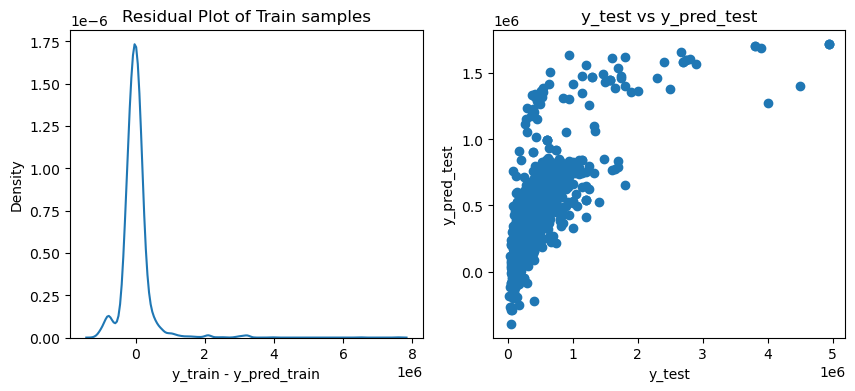

In [29]:
lr = LinearRegression()
car_pred_model(lr,"Linear_regressor.pkl")

In [30]:
rf = RandomForestRegressor()

# Number of trees in Random forest
n_estimators=list(range(500,1000,100))
# Maximum number of levels in a tree
max_depth=list(range(4,9,4))
# Minimum number of samples required to split an internal node
min_samples_split=list(range(4,9,2))
# Minimum number of samples required to be at a leaf node.
min_samples_leaf=[1,2,5,7]
# Number of fearures to be considered at each split
max_features=['auto','sqrt']

# Hyperparameters dict
param_grid = {"n_estimators":n_estimators,
              "max_depth":max_depth,
              "min_samples_split":min_samples_split,
              "min_samples_leaf":min_samples_leaf,
              "max_features":max_features}

rf_rs = RandomizedSearchCV(estimator = rf, param_distributions = param_grid)

Train R2-score : 0.75
Test R2-score : 0.76
Train CV scores : [0.58867449 0.72465384 0.41402817 0.65735231 0.59062192]
Train CV mean : 0.6


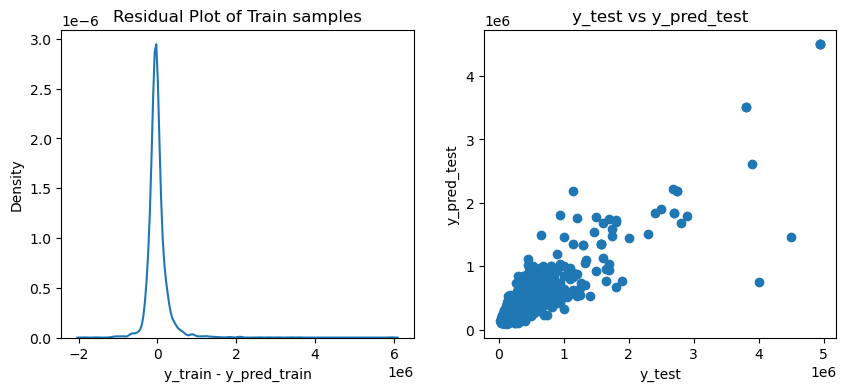

In [31]:
car_pred_model(rf_rs,'random_forest.pkl')

In [32]:
print(rf_rs.best_estimator_)

RandomForestRegressor(max_depth=8, max_features='sqrt', min_samples_split=6,
                      n_estimators=700)


In [33]:
ann_model = tf.keras.models.Sequential()
ann_model

In [34]:
# adding input and first hidden layer
ann_model.add(tf.keras.layers.Dense(units=6,activation='relu'))
# adding second hidden layer
ann_model.add(tf.keras.layers.Dense(units=6,activation='relu'))
ann_model.add(tf.keras.layers.Dense(units=6,activation='relu'))
# output layer
ann_model.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))
# compile ANN
ann_model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [35]:
# training model with train dataset 
history = ann_model.fit(X_train,y_train, batch_size=32, epochs=100, validation_data=(X_test, y_test))
history

Epoch 1/100


109/109 [==============================] - 2s 4ms/step - loss: -541362.8125 - accuracy: 0.0000e+00 - val_loss: -1177136.2500 - val_accuracy: 0.0000e+00
Epoch 2/100
109/109 [==============================] - 0s 2ms/step - loss: -2933062.2500 - accuracy: 0.0000e+00 - val_loss: -6419906.5000 - val_accuracy: 0.0000e+00
Epoch 3/100
109/109 [==============================] - 0s 2ms/step - loss: -14437742.0000 - accuracy: 0.0000e+00 - val_loss: -27543608.0000 - val_accuracy: 0.0000e+00
Epoch 4/100
109/109 [==============================] - 0s 2ms/step - loss: -54796472.0000 - accuracy: 0.0000e+00 - val_loss: -93678784.0000 - val_accuracy: 0.0000e+00
Epoch 5/100
109/109 [==============================] - 0s 2ms/step - loss: -173224000.0000 - accuracy: 0.0000e+00 - val_loss: -290115680.0000 - val_accuracy: 0.0000e+00
Epoch 6/100
109/109 [==============================] - 0s 2ms/step - loss: -482269056.0000 - accuracy: 0.0000e+00 - val_loss: -722527616.0000 - val_accuracy: 0.0000e+

109/109 [==============================] - 0s 2ms/step - loss: -1381778980864.0000 - accuracy: 0.0000e+00 - val_loss: -1379752083456.0000 - val_accuracy: 0.0000e+00
Epoch 46/100
109/109 [==============================] - 0s 2ms/step - loss: -1482851876864.0000 - accuracy: 0.0000e+00 - val_loss: -1478971883520.0000 - val_accuracy: 0.0000e+00
Epoch 47/100
109/109 [==============================] - 0s 2ms/step - loss: -1588396294144.0000 - accuracy: 0.0000e+00 - val_loss: -1583709683712.0000 - val_accuracy: 0.0000e+00
Epoch 48/100
109/109 [==============================] - 0s 2ms/step - loss: -1698953035776.0000 - accuracy: 0.0000e+00 - val_loss: -1692355657728.0000 - val_accuracy: 0.0000e+00
Epoch 49/100
109/109 [==============================] - 0s 2ms/step - loss: -1814539272192.0000 - accuracy: 0.0000e+00 - val_loss: -1805624541184.0000 - val_accuracy: 0.0000e+00
Epoch 50/100
109/109 [==============================] - 0s 2ms/step - loss: -1935258157056.0000 - accuracy: 0.0000e+00 - va

109/109 [==============================] - 0s 2ms/step - loss: -12881537007616.0000 - accuracy: 0.0000e+00 - val_loss: -12605308534784.0000 - val_accuracy: 0.0000e+00
Epoch 92/100
109/109 [==============================] - 0s 2ms/step - loss: -13335441440768.0000 - accuracy: 0.0000e+00 - val_loss: -13044070481920.0000 - val_accuracy: 0.0000e+00
Epoch 93/100
109/109 [==============================] - 0s 2ms/step - loss: -13797996625920.0000 - accuracy: 0.0000e+00 - val_loss: -13502343282688.0000 - val_accuracy: 0.0000e+00
Epoch 94/100
109/109 [==============================] - 0s 2ms/step - loss: -14272988971008.0000 - accuracy: 0.0000e+00 - val_loss: -13963284709376.0000 - val_accuracy: 0.0000e+00
Epoch 95/100
109/109 [==============================] - 0s 2ms/step - loss: -14759643578368.0000 - accuracy: 0.0000e+00 - val_loss: -14427107622912.0000 - val_accuracy: 0.0000e+00
Epoch 96/100
109/109 [==============================] - 0s 2ms/step - loss: -15259840544768.0000 - accuracy: 0.00

In [36]:
ann_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 90        
                                                                 
 dense_1 (Dense)             (None, 6)                 42        
                                                                 
 dense_2 (Dense)             (None, 6)                 42        
                                                                 
 dense_3 (Dense)             (None, 1)                 7         
                                                                 
Total params: 181 (724.00 Byte)
Trainable params: 181 (724.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


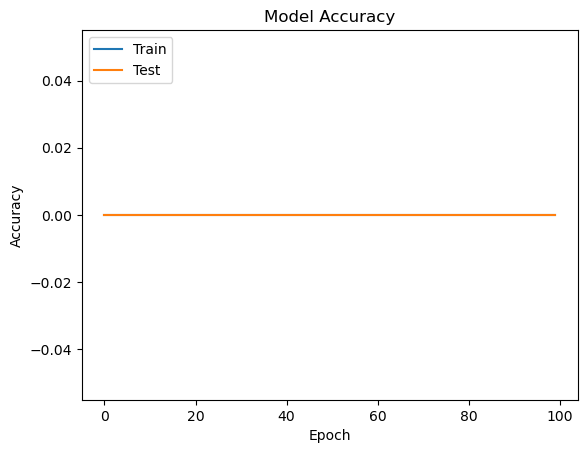

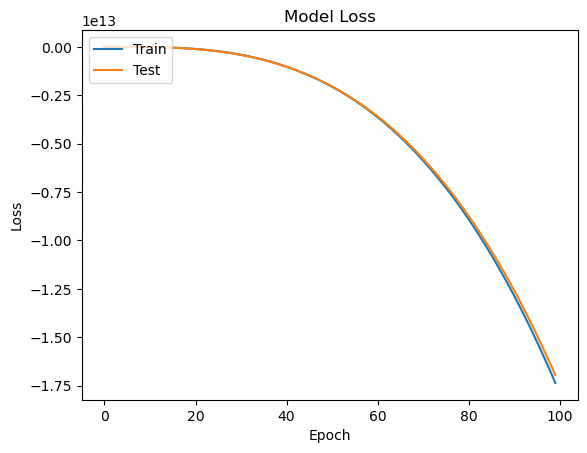

In [37]:
# plot validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

#plot validation loss value
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()